In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import warnings
import pickle

sys.path.append(os.path.abspath(os.path.join('../scripts')))

from clean_tellco_dataframe import Tellco
from plot_dataframe import Plotter

plot = Plotter()
cleaner = Tellco()

In [2]:
warnings.filterwarnings('ignore')

In [3]:
tellco_df = pd.read_csv("../data/clean_data.csv")

In [4]:
tellco_engagement_df = tellco_df[['MSISDN/Number','Bearer Id', 'Dur (ms)', 'Total Data Volume (Bytes)' ,'Social Media Data Volume (Bytes)', 'Google Data Volume (Bytes)',
    'Email Data Volume (Bytes)', 'Youtube Data Volume (Bytes)', 'Netflix Data Volume (Bytes)',
    'Gaming Data Volume (Bytes)', 'Other Data Volume (Bytes)']]
tellco_engagement_df

,MSISDN/Number,Bearer Id,Dur (ms),Total Data Volume (Bytes),Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes)
0,33664962239,-9223372036854775808,239865286.0,345629377.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0
1,33681854413,-9223372036854775808,239865286.0,707185356.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0
2,33760627129,-9223372036854775808,239865286.0,307690973.0,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0
3,33699795932,-9223372036854775808,239865286.0,607681403.0,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0
4,33665368271,-9223372036854775808,239865286.0,118487293.0,1624991.0,4906872.0,2090979.0,9120760.0,31212766.0,58881157.0,814303325.0
...,...,...,...,...,...,...,...,...,...,...,...
138066,33645655643,-9223372036854775808,113545185.0,922173944.0,892867.0,8922614.0,1565542.0,42219856.0,28354119.0,825524976.0,792559807.0
138067,33650688697,7277825670196679680,81230763.0,631804110.0,3517065.0,12784914.0,690876.0,27955095.0,37561864.0,535806880.0,16751926.0
138068,33663449963,7349883264234609664,97970704.0,705783925.0,2352181.0,4415361.0,2121718.0,22165518.0,40643294.0,631628095.0,714638145.0
138069,33621890103,-9223372036854775808,98249527.0,627698629.0,1260239.0,6585469.0,2058277.0,24516413.0,15029702.0,566933800.0,132415585.0


In [5]:
tellco_engagement_df = tellco_engagement_df.groupby(
    'MSISDN/Number').agg({'Bearer Id': 'count', 'Dur (ms)': 'sum', 'Total Data Volume (Bytes)': 'sum'})
tellco_engagement_df = tellco_engagement_df.rename(
    columns={'Bearer Id': 'number of xDR Sessions'})
tellco_engagement_df

,number of xDR Sessions,Dur (ms),Total Data Volume (Bytes)
MSISDN/Number,,,
33601001722,1,116720140.0,8.786906e+08
33601001754,1,181230963.0,1.568596e+08
33601007832,1,49878024.0,4.223207e+08
33601008617,2,37104453.0,1.457411e+09
33601010682,2,253983077.0,6.152172e+08
...,...,...,...
33789960306,1,157069852.0,7.102876e+08
33789967113,1,160461578.0,2.081231e+08
33789996170,1,8810688.0,7.146416e+08


In [6]:
tellco_engagement_df.sort_values('number of xDR Sessions',ascending=False).head(10)

,number of xDR Sessions,Dur (ms),Total Data Volume (Bytes)
MSISDN/Number,,,
33626320676,18,3.933949e+09,7.971167e+09
33625779332,17,4.054513e+09,8.499621e+09
33614892860,17,3.826926e+09,8.846226e+09
33659725664,16,3.440144e+09,7.705863e+09
33675877202,15,3.279797e+09,7.891111e+09
33760536639,15,3.339215e+09,8.514774e+09
33667163239,13,3.051298e+09,5.618394e+09
33604515716,12,2.727697e+09,5.487855e+09
33603127838,12,2.797866e+09,4.976195e+09


In [7]:
tellco_engagement_df.sort_values('Dur (ms)',ascending=False).head(10)

,number of xDR Sessions,Dur (ms),Total Data Volume (Bytes)
MSISDN/Number,,,
33625779332,17,4.054513e+09,8.499621e+09
33626320676,18,3.933949e+09,7.971167e+09
33614892860,17,3.826926e+09,8.846226e+09
33659725664,16,3.440144e+09,7.705863e+09
33760536639,15,3.339215e+09,8.514774e+09
33675877202,15,3.279797e+09,7.891111e+09
33667163239,13,3.051298e+09,5.618394e+09
33603127838,12,2.797866e+09,4.976195e+09
33627080969,12,2.730004e+09,5.754731e+09


In [8]:
tellco_engagement_df.sort_values('Total Data Volume (Bytes)',ascending=False).head(10)

,number of xDR Sessions,Dur (ms),Total Data Volume (Bytes)
MSISDN/Number,,,
33614892860,17,3.826926e+09,8.846226e+09
33760536639,15,3.339215e+09,8.514774e+09
33625779332,17,4.054513e+09,8.499621e+09
33626320676,18,3.933949e+09,7.971167e+09
33675877202,15,3.279797e+09,7.891111e+09
33659725664,16,3.440144e+09,7.705863e+09
33666464084,11,2.549901e+09,7.308501e+09
33664712899,11,2.561675e+09,6.872018e+09
33698792269,11,2.586966e+09,6.540899e+09


In [9]:
selected_metrics = tellco_engagement_df

scale_data = StandardScaler().fit_transform(selected_metrics)
scale_data

array([[-0.49203077, -0.16503338,  0.3859319 ],
       [-0.49203077,  0.34330808, -1.09205693],
       [-0.49203077, -0.69174528, -0.54851071],
       ...,
       [-0.49203077, -1.01535345,  0.05003262],
       [-0.49203077,  0.02620111, -0.42977986],
       [-0.49203077,  0.80534306, -0.19230338]])

In [10]:
normalized_data = normalize(scale_data)
normalized_data

array([[-0.76078506, -0.25517698,  0.59673345],
       [-0.39488482,  0.27552575, -0.87644255],
       [-0.48683242, -0.68443693, -0.54271565],
       ...,
       [-0.4356575 , -0.89902171,  0.04430025],
       [-0.75253815,  0.04007338, -0.65732828],
       [-0.51085735,  0.83615791, -0.19966149]])

Text(0.5, 1.0, 'Normalized data')

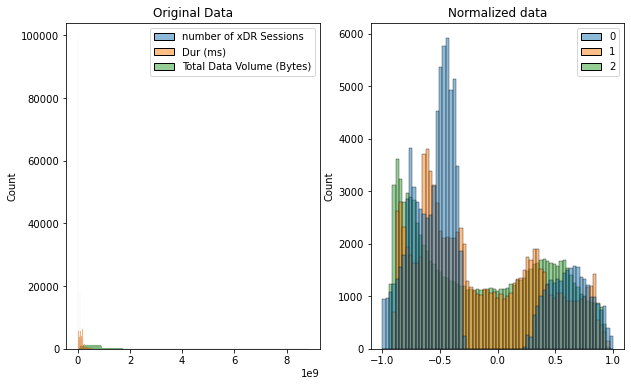

In [11]:
fig, ax=plt.subplots(1,2, figsize=(10, 6))
sns.histplot(selected_metrics, ax=ax[0])
ax[0].set_title("Original Data")
sns.histplot(normalized_data, ax=ax[1])
ax[1].set_title("Normalized data")

In [12]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
y_kmeans = kmeans.fit_predict(normalized_data)
X = np.array(normalized_data)
y_kmeans

array([2, 0, 0, ..., 2, 0, 0])

In [13]:
clustered_tellco_engagement_df = tellco_engagement_df.copy()
clustered_tellco_engagement_df.insert(0, 'Cluster', y_kmeans)
clustered_tellco_engagement_df

,Cluster,number of xDR Sessions,Dur (ms),Total Data Volume (Bytes)
MSISDN/Number,,,,
33601001722,2,1,116720140.0,8.786906e+08
33601001754,0,1,181230963.0,1.568596e+08
33601007832,0,1,49878024.0,4.223207e+08
33601008617,1,2,37104453.0,1.457411e+09
33601010682,1,2,253983077.0,6.152172e+08
...,...,...,...,...
33789960306,2,1,157069852.0,7.102876e+08
33789967113,0,1,160461578.0,2.081231e+08
33789996170,2,1,8810688.0,7.146416e+08


In [14]:
clustered_tellco_engagement_df['Cluster'].value_counts()

0    42834
2    28578
1    27703
Name: Cluster, dtype: int64

In [15]:
min_of_clusters = clustered_tellco_engagement_df.groupby('Cluster').agg({'number of xDR Sessions': 'min','Dur (ms)': 'min','Total Data Volume (Bytes)': 'min'})
min_of_clusters

,number of xDR Sessions,Dur (ms),Total Data Volume (Bytes)
Cluster,,,
0,1,7189000.0,33249009.0
1,1,18235797.0,161379366.0
2,1,7142988.0,434715210.0


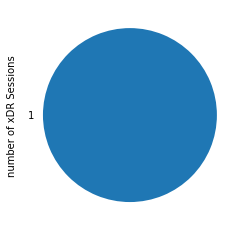

In [16]:
min_of_clusters['number of xDR Sessions'].value_counts().plot(kind='pie')

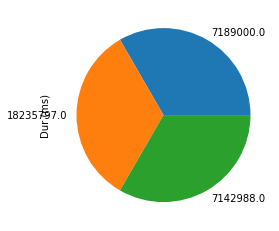

In [17]:
min_of_clusters['Dur (ms)'].value_counts().plot(kind='pie')

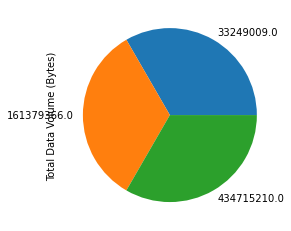

In [18]:
min_of_clusters['Total Data Volume (Bytes)'].value_counts().plot(kind='pie')

In [19]:
max_of_clusters = clustered_tellco_engagement_df.groupby('Cluster').agg({'number of xDR Sessions': 'max','Dur (ms)': 'max','Total Data Volume (Bytes)': 'max'})
max_of_clusters

,number of xDR Sessions,Dur (ms),Total Data Volume (Bytes)
Cluster,,,
0,2,2.398653e+08,7.613476e+08
1,18,4.054513e+09,8.846226e+09
2,1,2.185806e+08,9.507607e+08


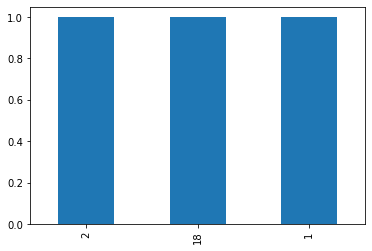

In [20]:
max_of_clusters['number of xDR Sessions'].value_counts().plot(kind='bar')

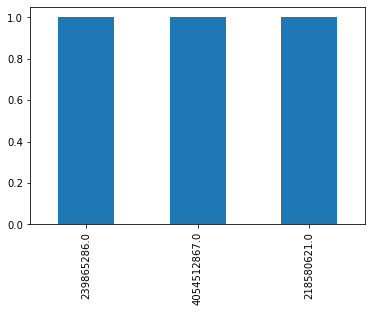

In [21]:
max_of_clusters['Dur (ms)'].value_counts().plot(kind='bar')

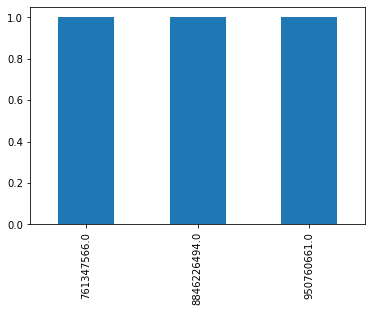

In [22]:
max_of_clusters['Total Data Volume (Bytes)'].value_counts().plot(kind='bar')

In [23]:
mean_of_clusters = clustered_tellco_engagement_df.groupby('Cluster').agg({'number of xDR Sessions': 'mean','Dur (ms)': 'mean','Total Data Volume (Bytes)': 'mean'})
mean_of_clusters

,number of xDR Sessions,Dur (ms),Total Data Volume (Bytes)
Cluster,,,
0,1.007657,1.085492e+08,3.305486e+08
1,2.394362,2.424841e+08,1.202882e+09
2,1.000000,7.969057e+07,7.322991e+08


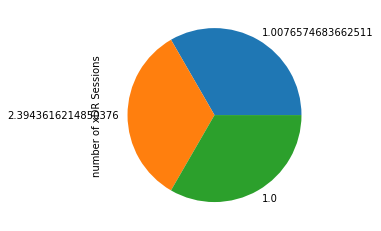

In [24]:
mean_of_clusters['number of xDR Sessions'].value_counts().plot(kind='pie')

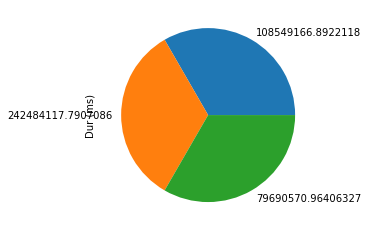

In [25]:
mean_of_clusters['Dur (ms)'].value_counts().plot(kind='pie')

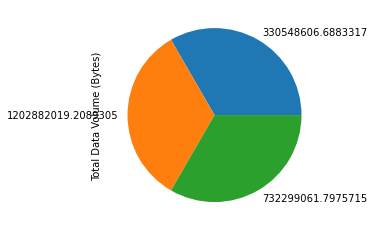

In [26]:
mean_of_clusters['Total Data Volume (Bytes)'].value_counts().plot(kind='pie')

In [27]:
total_of_clusters = clustered_tellco_engagement_df.groupby('Cluster').agg({'number of xDR Sessions': 'sum','Dur (ms)': 'sum','Total Data Volume (Bytes)': 'sum'})
total_of_clusters

,number of xDR Sessions,Dur (ms),Total Data Volume (Bytes)
Cluster,,,
0,43162,4.649595e+12,1.415872e+13
1,66331,6.717538e+12,3.332344e+13
2,28578,2.277397e+12,2.092764e+13


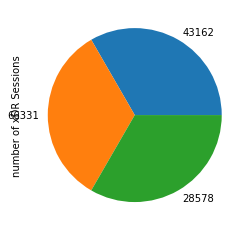

In [28]:
total_of_clusters['number of xDR Sessions'].value_counts().plot(kind='pie')

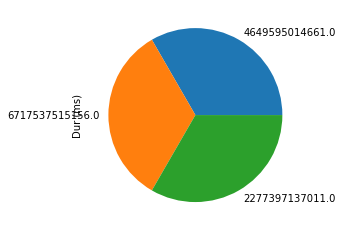

In [29]:
total_of_clusters['Dur (ms)'].value_counts().plot(kind='pie')

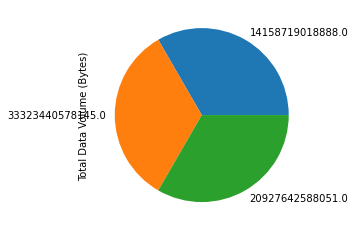

In [30]:
total_of_clusters['Total Data Volume (Bytes)'].value_counts().plot(kind='pie')

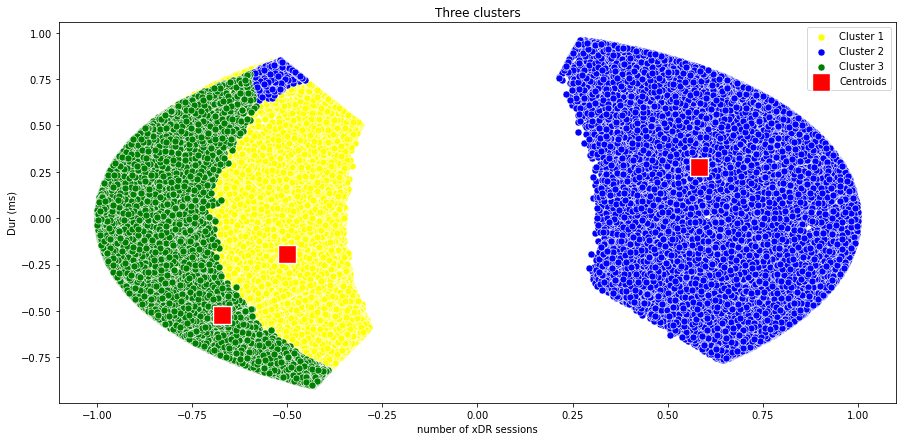

In [31]:

# size of image
plt.figure(figsize=(15,7))

# visualizing the clusters
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')

# labeling
# plt.grid(False)
plt.title('Three clusters')
plt.xlabel('number of xDR sessions')
plt.ylabel('Dur (ms)')
plt.legend()
plt.show()

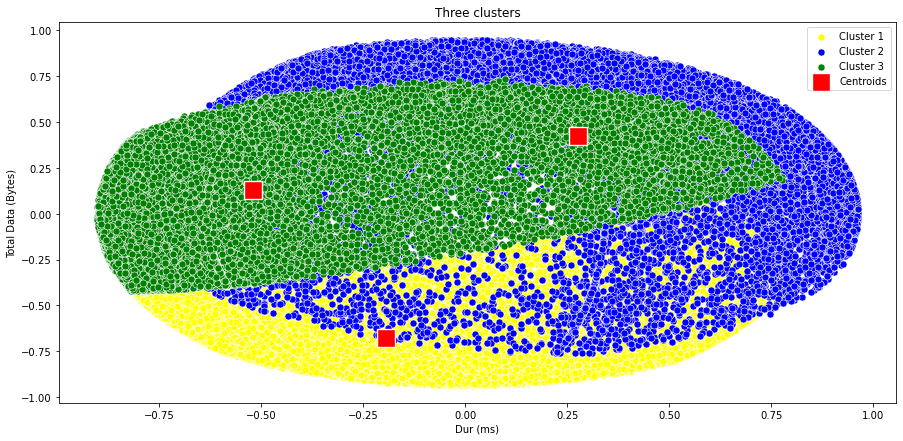

In [32]:

# size of image
plt.figure(figsize=(15,7))

# visualizing the clusters
sns.scatterplot(X[y_kmeans == 0, 1], X[y_kmeans == 0, 2], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 1], X[y_kmeans == 1, 2], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 1], X[y_kmeans == 2, 2], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], color = 'red', 
                label = 'Centroids',s=300,marker=',')

# labeling
# plt.grid(False)
plt.title('Three clusters')
plt.xlabel('Dur (ms)')
plt.ylabel('Total Data (Bytes)')
plt.legend()
plt.show()

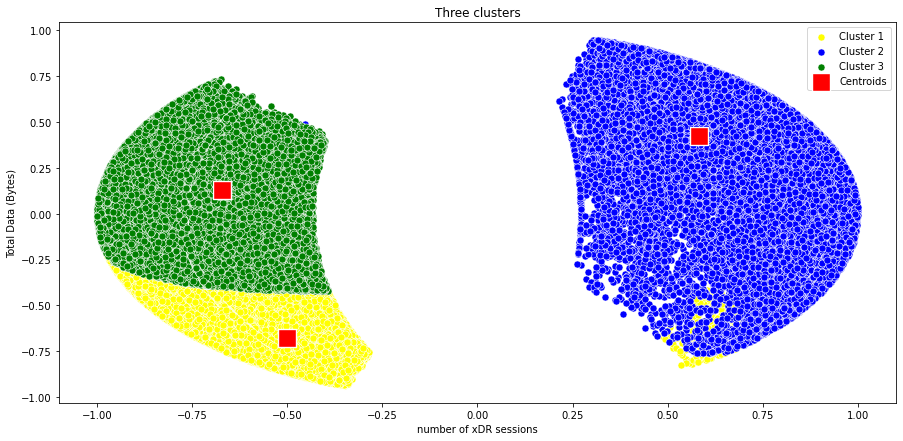

In [33]:
# size of image
plt.figure(figsize=(15,7))

# visualizing the clusters
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 2], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 2], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 2], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], color = 'red', 
                label = 'Centroids',s=300,marker=',')

# labeling
# plt.grid(False)
plt.title('Three clusters')
plt.xlabel('number of xDR sessions')
plt.ylabel('Total Data (Bytes)')
plt.legend()
plt.show()

In [34]:
df = tellco_df[['MSISDN/Number','Total Data Volume (Bytes)' ,'Social Media Data Volume (Bytes)', 'Google Data Volume (Bytes)',
    'Email Data Volume (Bytes)', 'Youtube Data Volume (Bytes)', 'Netflix Data Volume (Bytes)',
    'Gaming Data Volume (Bytes)', 'Other Data Volume (Bytes)']]
app_engagement_df = df.groupby('MSISDN/Number').sum()
app_engagement_df

,Total Data Volume (Bytes),Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes)
MSISDN/Number,,,,,,,,
33601001722,8.786906e+08,2232135.0,4389005.0,1331362.0,21624548.0,27180981.0,8.124587e+08,386570872.0
33601001754,1.568596e+08,2660565.0,5334863.0,3307781.0,12432223.0,11221763.0,1.197501e+08,281710071.0
33601007832,4.223207e+08,280294.0,9678493.0,2284670.0,6977321.0,1942092.0,3.911261e+08,35279702.0
33601008617,1.457411e+09,2912542.0,18499616.0,3305469.0,41533002.0,49201724.0,1.314798e+09,804804484.0
33601010682,6.152172e+08,3792912.0,15263134.0,7848596.0,34347122.0,30315501.0,5.116358e+08,492372777.0
...,...,...,...,...,...,...,...,...
33789960306,7.102876e+08,2486946.0,5990586.0,3984626.0,28947763.0,24293718.0,6.386099e+08,712062086.0
33789967113,2.081231e+08,1413370.0,9892882.0,3396607.0,28226479.0,30370302.0,1.348159e+08,408107210.0
33789996170,7.146416e+08,300183.0,7531269.0,1006915.0,26647843.0,14902538.0,6.603614e+08,295282817.0


In [35]:
apps_sum = app_engagement_df.sum().sort_values(ascending=False)
apps_sum

Total Data Volume (Bytes)           6.840980e+13
Gaming Data Volume (Bytes)          5.937606e+13
Other Data Volume (Bytes)           5.929889e+13
Youtube Data Volume (Bytes)         3.126121e+12
Netflix Data Volume (Bytes)         3.124374e+12
Google Data Volume (Bytes)          1.078049e+12
Email Data Volume (Bytes)           3.118182e+11
Social Media Data Volume (Bytes)    2.523879e+11
dtype: float64

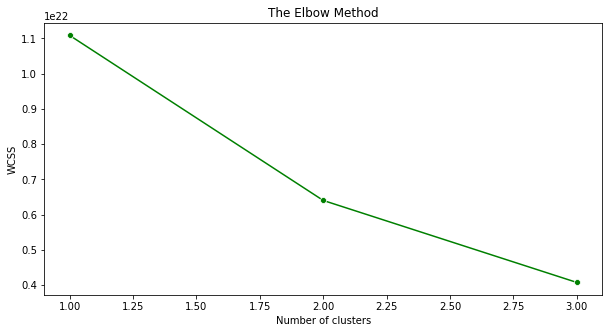

In [36]:
selected_metrics
wcss = []

# for loop 
for i in range(2, 5):
    
    # k-mean cluster model for different k values
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(selected_metrics)
    
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

# figure size
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 4), wcss,marker='o',color='green')

# labeling
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [37]:
kmeans = KMeans(n_clusters = 4, random_state = 42)
y_kmeans = kmeans.fit_predict(normalized_data)
X = np.array(normalized_data)
y_kmeans

array([0, 1, 1, ..., 0, 1, 3])

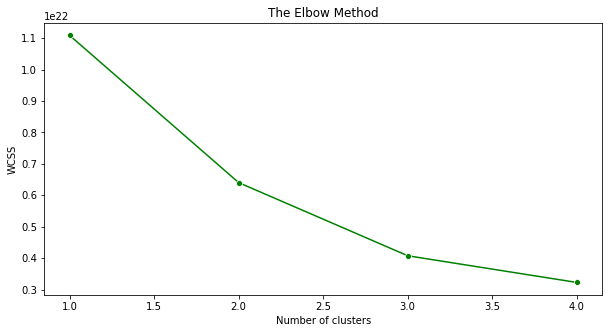

In [38]:
selected_metrics
wcss = []

# for loop 
for i in range(2, 6):
    
    # k-mean cluster model for different k values
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(selected_metrics)
    
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

# figure size
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 5), wcss,marker='o',color='green')

# labeling
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [39]:
kmeans = KMeans(n_clusters = 5, random_state = 42)
y_kmeans = kmeans.fit_predict(normalized_data)
X = np.array(normalized_data)
y_kmeans

array([0, 1, 1, ..., 0, 1, 3])

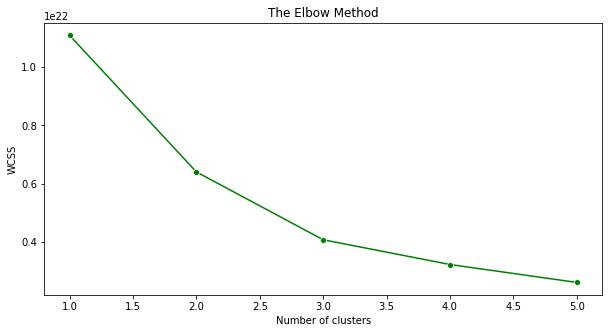

In [40]:
selected_metrics
wcss = []

# for loop 
for i in range(2, 7):
    
    # k-mean cluster model for different k values
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(selected_metrics)
    
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

# figure size
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 6), wcss,marker='o',color='green')

# labeling
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [41]:
kmeans = KMeans(n_clusters = 6, random_state = 42)
y_kmeans = kmeans.fit_predict(normalized_data)
X = np.array(normalized_data)
y_kmeans

array([0, 2, 3, ..., 0, 2, 4])

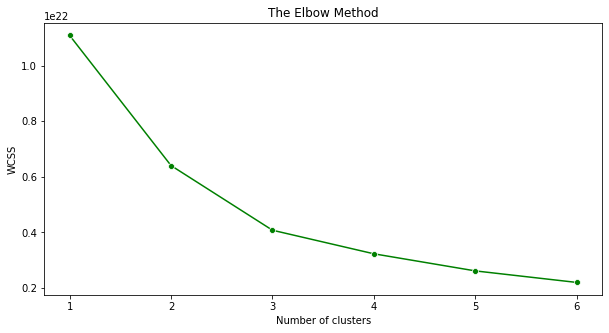

In [42]:
selected_metrics
wcss = []

# for loop 
for i in range(2, 8):
    
    # k-mean cluster model for different k values
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(selected_metrics)
    
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

# figure size
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 7), wcss,marker='o',color='green')

# labeling
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [43]:
#save the dataframe
clustered_tellco_engagement_df.to_csv('../data/user_engagement_data.csv')

In [44]:
with open("../models/user_engagement.pkl", "wb") as f:
    pickle.dump(kmeans, f)